# Imports

In [3]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

# Load datasets

In [103]:
datasets = list()
DATA_DIR = "../datasets/data"
TABULAR_SEP_FIX =  ["204", "205", "206", "207", "208", "225", "226", "242", "243"]

for dataset_filename in listdir(DATA_DIR):
    # 012_UCR_Anomaly_tiltAPB1_100000_114283_114350.txt
    # [0] [1] [2]     [3]      [4]    [5]    [6]   .txt
    split = dataset_filename.replace(".txt", "").split("_")
    
    dataset = {
        "number": split[0],
        "name": split[3],
        "train_end_idx": int(split[4]),
        "anomaly_start_idx": int(split[5]) - int(split[4]),
        "anomaly_end_idx": int(split[6]) - int(split[4]),
        "path": join(DATA_DIR, dataset_filename),
        "separator": "\n" if split[0] not in TABULAR_SEP_FIX else "  "
    }
    
    datasets.append(dataset)

In [106]:
datasets[9]

{'number': '206',
 'name': 'CHARISten',
 'train_end_idx': 25130,
 'anomaly_start_idx': 3950,
 'anomaly_end_idx': 4010,
 'path': '../datasets/data/206_UCR_Anomaly_CHARISten_25130_29080_29140.txt',
 'separator': '  '}

In [107]:
def load_dataset(dataset):
    with open(dataset["path"]) as file:
        data_ = [float(x) for x in filter(None, file.read().split(dataset["separator"]))]
    return data_

In [108]:
for i in range(len(datasets)):
    data = load_dataset(datasets[i])
    datasets[i]["train"] = pd.Series(data[:datasets[i]["train_end_idx"]])
    datasets[i]["test"] = pd.Series(data[datasets[i]["train_end_idx"]:])

In [109]:
datasets[9]

{'number': '206',
 'name': 'CHARISten',
 'train_end_idx': 25130,
 'anomaly_start_idx': 3950,
 'anomaly_end_idx': 4010,
 'path': '../datasets/data/206_UCR_Anomaly_CHARISten_25130_29080_29140.txt',
 'separator': '  ',
 'train': 0        7716.0
 1        7573.0
 2        7409.0
 3        7298.0
 4        7139.0
           ...  
 25125      58.0
 25126      58.0
 25127      63.0
 25128      55.0
 25129      62.0
 Length: 25130, dtype: float64,
 'test': 0          67.0
 1          59.0
 2          63.0
 3          46.0
 4          65.0
           ...  
 16865    8287.0
 16866    8202.0
 16867    8075.0
 16868    7880.0
 16869    7729.0
 Length: 16870, dtype: float64}

In [210]:
def plot_dataset(dataset, figsize=(20,6)):
    d = dataset
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    fig.suptitle("Number: {} \n Name: {}".format(d["number"], d["name"]))
    
    # Plot test + train
    offset1 = np.array(range(len(d["test"]))) + len(d["train"])
    offset2 = np.array(range(d["anomaly_end_idx"] - d["anomaly_start_idx"])) + len(d["train"]) + d["anomaly_start_idx"]
    
    axs[0].plot(d["train"], color="palegreen")
    axs[0].plot(offset1, d["test"], color="skyblue")
    axs[0].plot(offset2, d["test"][d["anomaly_start_idx"]:d["anomaly_end_idx"]], color="red")
    
    axs[0].legend(["Train", "Test", "Anomaly"])
    
    # Show anonmaly
    
    
    offset3 = np.array(range(len(d["test"])+1000))
    
    axs[1].plot(d["test"][(d["anomaly_start_idx"]-1000):(d["anomaly_end_idx"]+1000)], color="lightblue")
    axs[1].plot(d["test"][(d["anomaly_start_idx"]):(d["anomaly_end_idx"])], color="red")
    

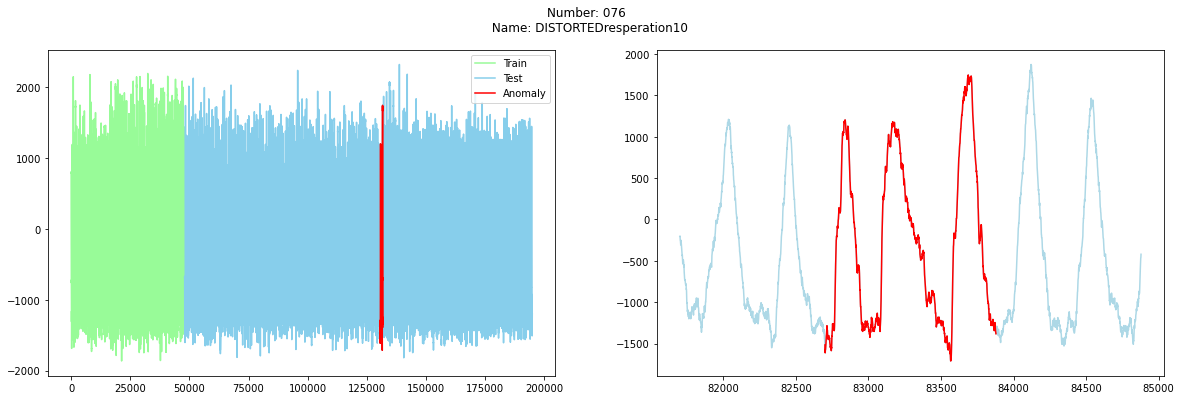

In [211]:
plot_dataset(datasets[13])